In [0]:
# Importing some of the needed Python libraries for operations on retreiving and working on dataframe 
import numpy as np
import pandas as pd


In [0]:
# library for working with files in google colab  
from google.colab import files

In [0]:
# uploaded file is saved in df dataframe
uploaded = files.upload()
df = pd.read_excel('Task to candidates.xlsx', sheet_name='Stable to Predict')

Saving Task to candidates.xlsx to Task to candidates.xlsx


In [0]:
# checking out first 5 lines of df with head function
df.head()

,Client Code,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (USD),Monthly Google Play purchases from card (USD),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL),Predicted maximum default days within a year according to the model,Predicted default days within a year in CRISIS*\nscenario
0,150015,5688,474.000000,50,500.0,2,0,0,0,0,NaN,NaN
1,150016,7699,641.583333,51,233.0,5,0,0,0,0,NaN,NaN
2,150017,3494,291.166667,19,600.0,5,48,27,169,20,NaN,NaN
3,150018,3485,290.416667,20,650.0,5,39,26,150,15,NaN,NaN
4,150019,5416,451.333333,25,700.0,2,41,0,218,0,NaN,NaN


In [0]:
# getting to know the shape of the dataframe 
df.shape

(20, 12)

In [0]:
# checking whether there is a NA values, and the number of NA values
df.isna().sum()

Client Code                                                              0
Loan amount (issued in AZN)                                              0
Monthly payment (AZN)                                                    0
Age                                                                      0
Salary (AZN)                                                             1
Bank history (years)                                                     0
Monthly Amazon purchases from card (USD)                                 0
Monthly Google Play purchases from card (USD)                            0
Grocery purchases from card (AZN)                                        0
Maximum default days within a year (FACTUAL)                             0
Predicted maximum default days within a year according to the model     20
Predicted default days within a year in CRISIS*\nscenario               20
dtype: int64

In [0]:
# getting to know several statistical values based off dataframe such as mean, std, percentiles, etc
df.describe()

,Client Code,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (USD),Monthly Google Play purchases from card (USD),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL),Predicted maximum default days within a year according to the model,Predicted default days within a year in CRISIS*\nscenario
count,20.00000,20.00000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,0.0
mean,150024.50000,4979.35000,414.945833,39.750000,444.894737,3.300000,21.300000,6.350000,131.600000,7.600000,NaN,NaN
std,5.91608,2337.99359,194.832799,15.790987,179.968175,1.559352,22.715865,15.051753,144.573929,8.331298,NaN,NaN
min,150015.00000,642.00000,53.500000,19.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,150019.75000,2866.25000,238.854167,25.000000,340.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,150024.50000,5630.00000,469.166667,45.000000,400.000000,3.500000,15.000000,0.000000,159.500000,5.500000,NaN,NaN
75%,150029.25000,6620.00000,551.666667,50.250000,500.000000,5.000000,39.500000,0.000000,197.750000,13.500000,NaN,NaN
max,150034.00000,8376.00000,698.000000,70.000000,920.000000,5.000000,62.000000,59.000000,454.000000,25.000000,NaN,NaN


In [0]:
# filling out the NA value with 50 percentile value in salary column
df['Salary (AZN)'] = df['Salary (AZN)'].fillna(df['Salary (AZN)'].describe()['50%'])

In [0]:
df

,Client Code,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (USD),Monthly Google Play purchases from card (USD),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL),Predicted maximum default days within a year according to the model,Predicted default days within a year in CRISIS*\nscenario
0,150015,5688,474.000000,50,500.0,2,0,0,0,0,NaN,NaN
1,150016,7699,641.583333,51,233.0,5,0,0,0,0,NaN,NaN
2,150017,3494,291.166667,19,600.0,5,48,27,169,20,NaN,NaN
3,150018,3485,290.416667,20,650.0,5,39,26,150,15,NaN,NaN
4,150019,5416,451.333333,25,700.0,2,41,0,218,0,NaN,NaN
5,150020,2606,217.166667,27,500.0,4,41,0,187,0,NaN,NaN
6,150021,6469,539.083333,23,400.0,2,39,15,239,0,NaN,NaN
7,150022,7664,638.666667,30,920.0,5,28,0,187,0,NaN,NaN
8,150023,8376,698.000000,45,500.0,2,16,0,445,10,NaN,NaN
9,150024,6830,569.166667,48,300.0,1,0,0,0,11,NaN,NaN


In [0]:
# Experimental Simple Imputer libary way for filling NA values
# from sklearn.impute import SimpleImputer 
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# imputer.fit(df.iloc[:, 1:10])
# df.iloc[:, 1:10] = imputer.transform(df.iloc[:, 1:10])

In [0]:
# dropping Client Code, Predicted1 and Predicted2 columns in dataframe
df = df.drop(columns=['Predicted maximum default days within a year according to the model '])
df = df.drop(columns=['Predicted default days within a year in CRISIS*\nscenario'])
df = df.drop(columns=['Client Code'])

In [0]:
df

,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (USD),Monthly Google Play purchases from card (USD),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL)
0,5688,474.000000,50,500.0,2,0,0,0,0
1,7699,641.583333,51,233.0,5,0,0,0,0
2,3494,291.166667,19,600.0,5,48,27,169,20
3,3485,290.416667,20,650.0,5,39,26,150,15
4,5416,451.333333,25,700.0,2,41,0,218,0
5,2606,217.166667,27,500.0,4,41,0,187,0
6,6469,539.083333,23,400.0,2,39,15,239,0
7,7664,638.666667,30,920.0,5,28,0,187,0
8,8376,698.000000,45,500.0,2,16,0,445,10
9,6830,569.166667,48,300.0,1,0,0,0,11


In [0]:
df.isna().sum()

Loan amount (issued in AZN)                      0
Monthly payment (AZN)                            0
Age                                              0
Salary (AZN)                                     0
Bank history (years)                             0
Monthly Amazon purchases from card (USD)         0
Monthly Google Play purchases from card (USD)    0
Grocery purchases from card (AZN)                0
Maximum default days within a year (FACTUAL)     0
dtype: int64

In [0]:
# checking out the numerical correlation between different columns in dataframe whether there are positive, negative, strong or weak correlations
df.corr()

,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (USD),Monthly Google Play purchases from card (USD),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL)
Loan amount (issued in AZN),1.000000,1.000000,0.203254,-0.012925,-0.278451,-0.419322,-0.268683,0.095945,-0.311488
Monthly payment (AZN),1.000000,1.000000,0.203254,-0.012925,-0.278451,-0.419322,-0.268683,0.095945,-0.311488
Age,0.203254,0.203254,1.000000,-0.590667,-0.129315,-0.884393,-0.551433,-0.503731,-0.015602
Salary (AZN),-0.012925,-0.012925,-0.590667,1.000000,0.194312,0.441073,0.105694,0.223888,-0.149523
Bank history (years),-0.278451,-0.278451,-0.129315,0.194312,1.000000,0.107278,0.383228,-0.171967,0.309516
Monthly Amazon purchases from card (USD),-0.419322,-0.419322,-0.884393,0.441073,0.107278,1.000000,0.592316,0.544733,0.061850
Monthly Google Play purchases from card (USD),-0.268683,-0.268683,-0.551433,0.105694,0.383228,0.592316,1.000000,0.185407,0.604295
Grocery purchases from card (AZN),0.095945,0.095945,-0.503731,0.223888,-0.171967,0.544733,0.185407,1.000000,0.040629
Maximum default days within a year (FACTUAL),-0.311488,-0.311488,-0.015602,-0.149523,0.309516,0.061850,0.604295,0.040629,1.000000


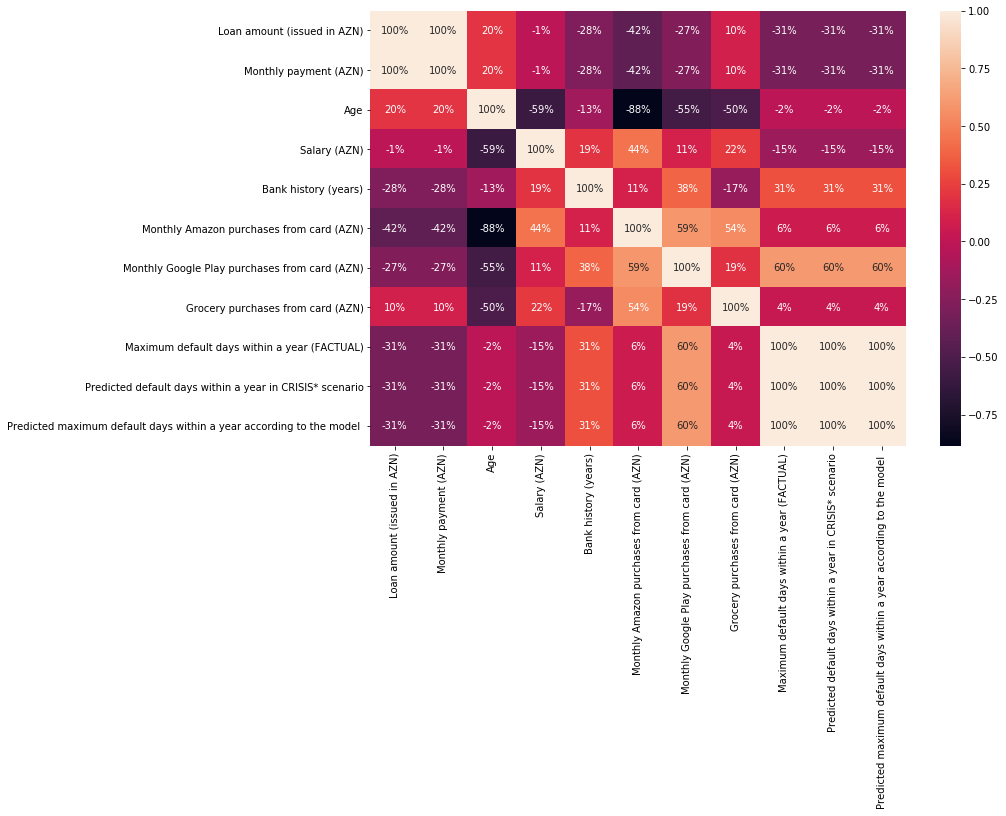

In [139]:
# Visualizing the correlation values with matplotlib and seaborn libraries of python
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [0]:
# Split model to X features set and y, predicticted values set
X = df.iloc[:, :-1]
Y = df.iloc[:,-1]

In [0]:
# Below lines is experimental section for train and test split for data which is not required (so that data is directly precited from full X features)
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)

In [0]:
# from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1)
# forest.fit(X_train, Y_train)

In [0]:
# model = forest
# model.score(X_train, Y_train)
# predictions = model.predict(X_test)

In [0]:
# print(predictions)
# print(Y_test)

In [0]:
# from sklearn.metrics import classification_report, accuracy_score
# print(classification_report(Y_test, predictions))
# print(accuracy_score(Y_test, predictions))

In [0]:
# Model is trained with Decision Tree and RandomForest Classifiers
def models(X_train, Y_train):
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  print('[0] Desc Tree: ', tree.score(X_train, Y_train))
  print('[0] Rand Forest: ', forest.score(X_train, Y_train))

  return tree, forest

In [115]:
# Accuracy of both models is calculated here as seen being 100 in train set itself
model = models(X, Y)

[0] Desc Tree:  1.0
[0] Rand Forest:  1.0


In [117]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X, Y)

model = tree
model.score(X,Y)

1.0

In [0]:
predictions = model.predict(X)

In [132]:
# Predicted values is saved in predictions array for later save in corresponding column
predictions

array([ 0,  0, 20, 15,  0,  0,  0,  0, 10, 11,  0, 12,  0,  0, 16, 17, 25,
        1, 13, 12])

In [0]:
df['Predicted maximum default days within a year according to the model '] = predictions

In [135]:
df

,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (AZN),Monthly Google Play purchases from card (AZN),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL),Predicted default days within a year in CRISIS* scenario,Predicted maximum default days within a year according to the model
0,5688,474.000000,50,500.0,2,0.000,0.000,0,0,0,0
1,7699,641.583333,51,233.0,5,0.000,0.000,0,0,0,0
2,3494,291.166667,19,600.0,5,112.608,63.342,169,20,20,20
3,3485,290.416667,20,650.0,5,91.494,60.996,150,15,15,15
4,5416,451.333333,25,700.0,2,96.186,0.000,218,0,0,0
5,2606,217.166667,27,500.0,4,96.186,0.000,187,0,0,0
6,6469,539.083333,23,400.0,2,91.494,35.190,239,0,0,0
7,7664,638.666667,30,920.0,5,65.688,0.000,187,0,0,0
8,8376,698.000000,45,500.0,2,37.536,0.000,445,10,10,10
9,6830,569.166667,48,300.0,1,0.000,0.000,0,11,11,11


In [0]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(Y_test, model.predict(X_test))

# TN = cm[0][0]
# TP = cm[1][1]
# FN = cm[1][0]
# FP = cm[0][1]

# print(((TP+TN)/(TP+TN+FN+FP)))
# print(cm)

In [0]:



# Second Dataset after inflation and change applied to the columns (between USD to AZN)



In [0]:
# Values of dataframe is saved to the dff dataframe for the second model
dff = df.iloc[:,:]

In [0]:
# convertion of USD values to AZN and calculation of inflation rate with multiplication to 1.38 (as mentioned in excel)
dff['Monthly Amazon purchases from card (USD)'] = dff['Monthly Amazon purchases from card (USD)']*1.7*1.38
dff['Monthly Google Play purchases from card (USD)'] = dff['Monthly Google Play purchases from card (USD)']*1.7*1.38

In [0]:
# Rename the columns correspondingly after convertions
dff.rename(columns={'Monthly Amazon purchases from card (USD)': 'Monthly Amazon purchases from card (AZN)'}, inplace=True)

In [0]:
dff.rename(columns={'Monthly Google Play purchases from card (USD)': 'Monthly Google Play purchases from card (AZN)'}, inplace=True)

In [0]:
dff

,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (AZN),Monthly Google Play purchases from card (AZN),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL)
0,5688,474.000000,50,500.0,2,0.000,0.000,0,0
1,7699,641.583333,51,233.0,5,0.000,0.000,0,0
2,3494,291.166667,19,600.0,5,112.608,63.342,169,20
3,3485,290.416667,20,650.0,5,91.494,60.996,150,15
4,5416,451.333333,25,700.0,2,96.186,0.000,218,0
5,2606,217.166667,27,500.0,4,96.186,0.000,187,0
6,6469,539.083333,23,400.0,2,91.494,35.190,239,0
7,7664,638.666667,30,920.0,5,65.688,0.000,187,0
8,8376,698.000000,45,500.0,2,37.536,0.000,445,10
9,6830,569.166667,48,300.0,1,0.000,0.000,0,11


In [81]:

# checking for NA values
dff.isna().sum()

Loan amount (issued in AZN)                      0
Monthly payment (AZN)                            0
Age                                              0
Salary (AZN)                                     0
Bank history (years)                             0
Monthly Amazon purchases from card (AZN)         0
Monthly Google Play purchases from card (AZN)    0
Grocery purchases from card (AZN)                0
Maximum default days within a year (FACTUAL)     0
dtype: int64

In [82]:
# checking for correlation between columns
dff.corr()

,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (AZN),Monthly Google Play purchases from card (AZN),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL)
Loan amount (issued in AZN),1.000000,1.000000,0.203254,-0.012925,-0.278451,-0.419322,-0.268683,0.095945,-0.311488
Monthly payment (AZN),1.000000,1.000000,0.203254,-0.012925,-0.278451,-0.419322,-0.268683,0.095945,-0.311488
Age,0.203254,0.203254,1.000000,-0.590667,-0.129315,-0.884393,-0.551433,-0.503731,-0.015602
Salary (AZN),-0.012925,-0.012925,-0.590667,1.000000,0.194312,0.441073,0.105694,0.223888,-0.149523
Bank history (years),-0.278451,-0.278451,-0.129315,0.194312,1.000000,0.107278,0.383228,-0.171967,0.309516
Monthly Amazon purchases from card (AZN),-0.419322,-0.419322,-0.884393,0.441073,0.107278,1.000000,0.592316,0.544733,0.061850
Monthly Google Play purchases from card (AZN),-0.268683,-0.268683,-0.551433,0.105694,0.383228,0.592316,1.000000,0.185407,0.604295
Grocery purchases from card (AZN),0.095945,0.095945,-0.503731,0.223888,-0.171967,0.544733,0.185407,1.000000,0.040629
Maximum default days within a year (FACTUAL),-0.311488,-0.311488,-0.015602,-0.149523,0.309516,0.061850,0.604295,0.040629,1.000000


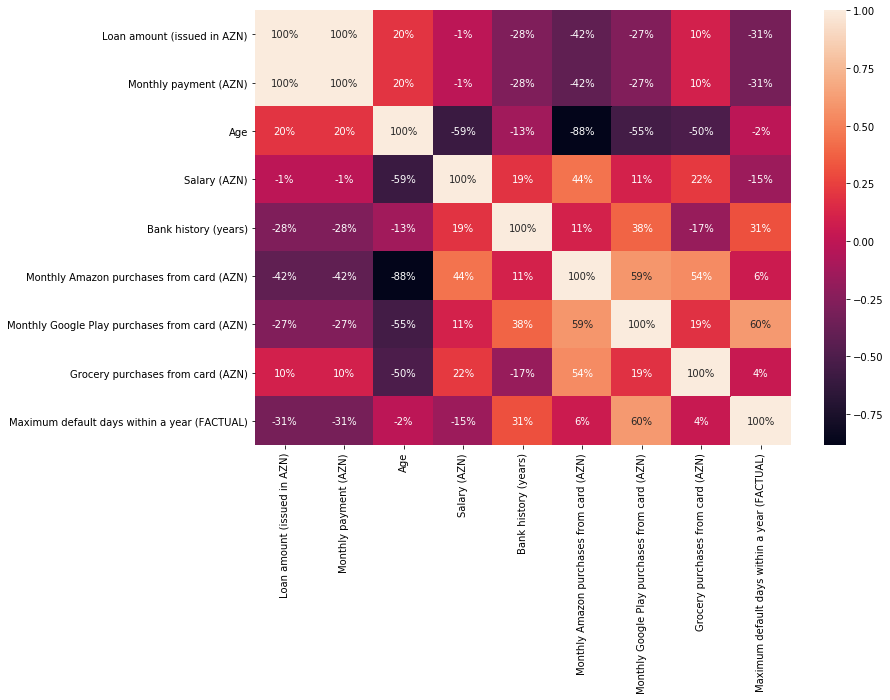

In [83]:
# visualization of values with heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(dff.corr(), annot=True, fmt='.0%')

In [0]:
# XX and YY features and predicted values 
XX = dff.iloc[:,:-1]
YY = dff.iloc[:,-1]

In [0]:
# RandomForestClassifier is trained for the next dff
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)

In [91]:
forest.fit(XX, YY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [123]:
modell = forest
modell.score(XX, YY)

1.0

In [0]:
predictionss = modell.predict(XX)

In [125]:
predictionss

array([ 0,  0, 20, 15,  0,  0,  0,  0, 10, 11,  0, 12,  0,  0, 16, 17, 25,
        1, 13, 12])

In [0]:
# Predicted values are saved to the Crisis scenario columns
dff['Predicted default days within a year in CRISIS* scenario'] = predictionss

In [137]:
dff

,Loan amount (issued in AZN),Monthly payment (AZN),Age,Salary (AZN),Bank history (years),Monthly Amazon purchases from card (AZN),Monthly Google Play purchases from card (AZN),Grocery purchases from card (AZN),Maximum default days within a year (FACTUAL),Predicted default days within a year in CRISIS* scenario,Predicted maximum default days within a year according to the model
0,5688,474.000000,50,500.0,2,0.000,0.000,0,0,0,0
1,7699,641.583333,51,233.0,5,0.000,0.000,0,0,0,0
2,3494,291.166667,19,600.0,5,112.608,63.342,169,20,20,20
3,3485,290.416667,20,650.0,5,91.494,60.996,150,15,15,15
4,5416,451.333333,25,700.0,2,96.186,0.000,218,0,0,0
5,2606,217.166667,27,500.0,4,96.186,0.000,187,0,0,0
6,6469,539.083333,23,400.0,2,91.494,35.190,239,0,0,0
7,7664,638.666667,30,920.0,5,65.688,0.000,187,0,0,0
8,8376,698.000000,45,500.0,2,37.536,0.000,445,10,10,10
9,6830,569.166667,48,300.0,1,0.000,0.000,0,11,11,11


In [138]:
dff.columns

Index(['Loan amount (issued in AZN)', 'Monthly payment (AZN)', 'Age',
       'Salary (AZN)', 'Bank history (years)',
       'Monthly Amazon purchases from card (AZN)',
       'Monthly Google Play purchases from card (AZN)',
       'Grocery purchases from card (AZN)',
       'Maximum default days within a year (FACTUAL)',
       'Predicted default days within a year in CRISIS* scenario',
       'Predicted maximum default days within a year according to the model '],
      dtype='object')